In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [40]:
filename = '/home/uceckz0/Project/cgcnn/jobs/band_gap0415/band_gap.o299365'

with open(filename, 'r') as file: 
    data = file.read()

In [42]:
# Parsing the log data using regular expressions
pattern = re.compile(r'Epoch: \[(\d+)\].*?Loss ([\d.]+) .*?MAE ([\d.]+)')
val_pattern = re.compile(r'Validation:.*?Loss ([\d.]+) .*?MAE ([\d.]+)')

In [43]:
epoch_data = {}
val_data = []

In [44]:
# Parsing training and validation data
for line in data.split('\n'):
    match = pattern.search(line)
    if match:
        epoch, loss, mae = match.groups()
        if epoch not in epoch_data:
            epoch_data[epoch] = {'Train_Loss': [], 'Train_MAE': []}
        epoch_data[epoch]['Train_Loss'].append(float(loss))
        epoch_data[epoch]['Train_MAE'].append(float(mae))
    val_match = val_pattern.search(line)
    if val_match:
        v_loss, v_mae = val_match.groups()
        val_data.append((float(v_loss), float(v_mae)))

In [45]:
# Averaging training losses and MAEs per epoch if multiple entries exist
for epoch in epoch_data:
    epoch_data[epoch]['Train_Loss'] = sum(epoch_data[epoch]['Train_Loss']) / len(epoch_data[epoch]['Train_Loss'])
    epoch_data[epoch]['Train_MAE'] = sum(epoch_data[epoch]['Train_MAE']) / len(epoch_data[epoch]['Train_MAE'])

In [46]:
# Prepare DataFrame
epochs = sorted(epoch_data.keys(), key=int)
train_loss = [epoch_data[epoch]['Train_Loss'] for epoch in epochs]
train_mae = [epoch_data[epoch]['Train_MAE'] for epoch in epochs]
valid_loss = [loss for loss, _ in val_data]
valid_mae = [mae for _, mae in val_data]

In [47]:
# Handling potential mismatch in data length
min_length = min(len(train_loss), len(valid_loss))
epochs = epochs[:min_length]
train_loss = train_loss[:min_length]
train_mae = train_mae[:min_length]
valid_loss = valid_loss[:min_length]
valid_mae = valid_mae[:min_length]

In [48]:
df = pd.DataFrame({
    'Epoch': [int(epoch) for epoch in epochs],
    'Train_Loss': train_loss,
    'Valid_Loss': valid_loss,
    'Train_MAE': train_mae,
    'Valid_MAE': valid_mae
})

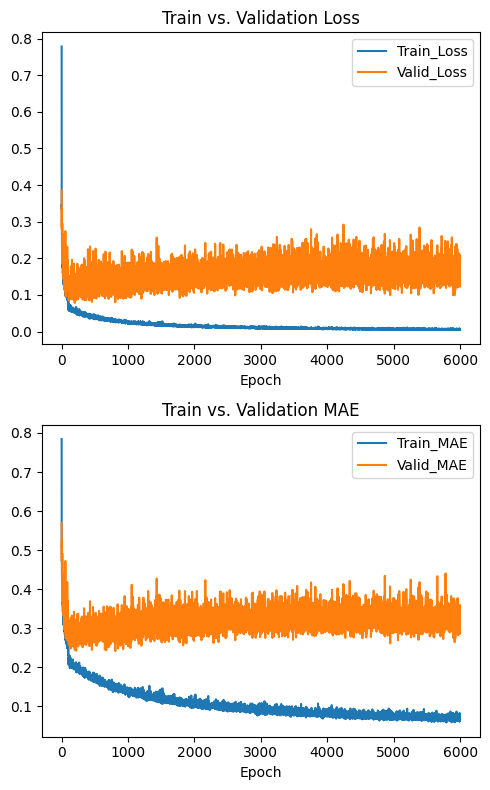

In [50]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 8))
df.plot(x='Epoch', y=['Train_Loss', 'Valid_Loss'], ax=axes[0], title='Train vs. Validation Loss')
df.plot(x='Epoch', y=['Train_MAE', 'Valid_MAE'], ax=axes[1], title='Train vs. Validation MAE')
plt.tight_layout()
plt.show()

In [51]:
import pandas as pd

# Assuming the CSV file is named 'data.csv' and is in the same directory as your script
filename = '/home/uceckz0/Project/cgcnn/jobs/output/test_results.csv'
df = pd.read_csv(filename, header=None)

In [52]:
df.head()

,0,1,2
0,qmof-0ca8ad2,3.160185,2.829943
1,qmof-df4acb0,0.516231,0.742952
2,qmof-aed4c70,2.572999,2.324405
3,qmof-f10ba6e,2.143690,2.006527
4,qmof-b6754fb,2.521154,2.633237


In [53]:
df.columns = ['ID', 'Ground Truth', 'Prediction']

In [54]:
df.head()

,ID,Ground Truth,Prediction
0,qmof-0ca8ad2,3.160185,2.829943
1,qmof-df4acb0,0.516231,0.742952
2,qmof-aed4c70,2.572999,2.324405
3,qmof-f10ba6e,2.143690,2.006527
4,qmof-b6754fb,2.521154,2.633237


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


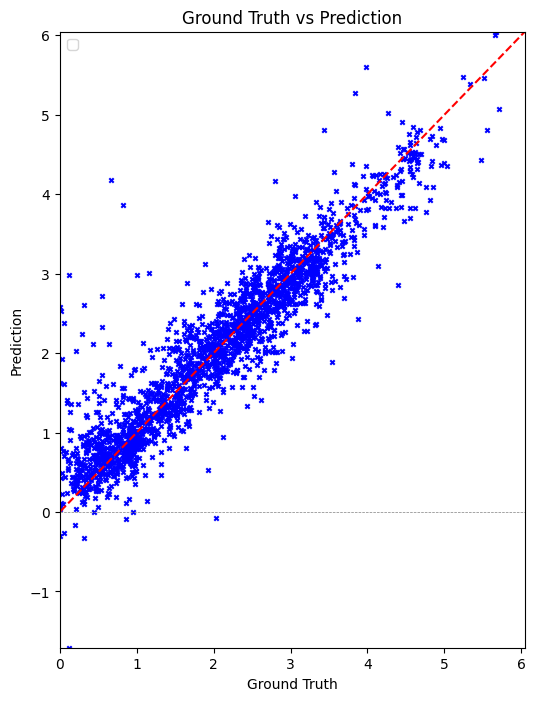

In [64]:
plt.figure(figsize=(6, 8))  # Set the figure size (optional)
plt.scatter(df['Ground Truth'], df['Prediction'], color='blue', s=10, marker='x')  # Create scatter plot

# Add a horizontal line at y = 0
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')

# Add a line where x = y
max_val = max(df['Ground Truth'].max(), df['Prediction'].max())  # Find the maximum value for limits
min_val = min(df['Ground Truth'].min(), df['Prediction'].min())  # Find the minimum value for limits
plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # Plot x = y line



plt.title('Ground Truth vs Prediction')  # Title of the plot
plt.xlabel('Ground Truth')  # X-axis label
plt.ylabel('Prediction')  # Y-axis label
plt.xlim(0, max_val)  # Set the limits of the x-axis
plt.ylim(min_val, max_val)  # Set the limits of the y-axis
plt.legend()  # Show legend
plt.show()